In [1]:
from atmPy import sizedistribution

In [2]:
%matplotlib inline

# size distribution

## simulate a sizedistribution

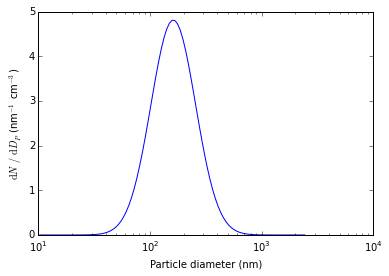

In [194]:
sd = sizedistribution.simulate_sizedistribution(diameter=[10, 2500],
                                                numberOfDiameters=100, 
                                                centerOfAerosolMode=200, 
                                                widthOfAerosolMode=0.2, 
                                                numberOfParticsInMode=1000)
f,a = sd.plot_distribution()

## convert size distribution between representations

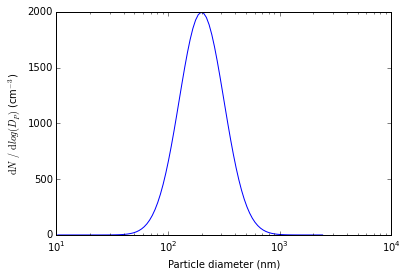

In [139]:
sd = sd.convert2dNdlogDp() #this is not an inplace operation. It returns a new object
f,a = sd.plot_distribution()

## save and read a sizedistribution

haeder: 3


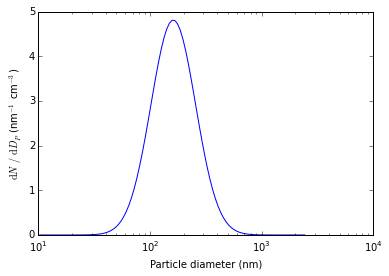

In [201]:
sd.save_csv('tmp/bla.cvs')
unsave = sizedistribution.read_distribution_csv('tmp/bla.cvs')
f,a = unsave.plot_distribution()

#size distribution time series

## simulate sizedistribution time series

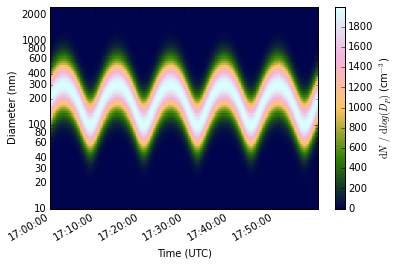

In [206]:
sdtsf = sizedistribution.simulate_sizedistribution_timeseries()
sdtsf = sdtsf.convert2dNdlogDp()
f,a,pc,cb = sdtsf.plot_distribution(removeTickLabels=['50', '70', '90', '500','700', '900'])

# size distribution layer series

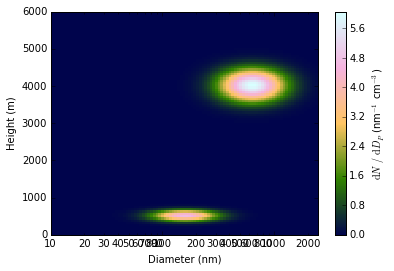

In [274]:
sdls = sizedistribution.simulate_sizedistribution_layerseries()
f,a,pc,cb = sdls.plot_distribution()

In [273]:
reload(sizedistribution)

<module 'atmPy.sizedistribution' from '/Users/htelg/prog/atm-py/atmPy/sizedistribution.py'>